In [378]:
#importing dependencies
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import cv2
import os

In [379]:
#listing output classes
train_dir = "data/train"
files = os.listdir(train_dir)
files


['character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_1_ka',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_2_kha',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'character_3_ga',
 'character_4_gha',
 'character_5_kna',
 'character_6_cha',
 'character_7_chha',
 'character_8_ja',
 'character_9_jha',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [380]:
#collecting training data
train_data = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size = 128, label_mode='categorical', image_size=(32, 32), color_mode = 'grayscale')

Found 78292 files belonging to 46 classes.


In [381]:
train_data_iterator = train_data.as_numpy_iterator()

In [382]:
batch = train_data_iterator.next()

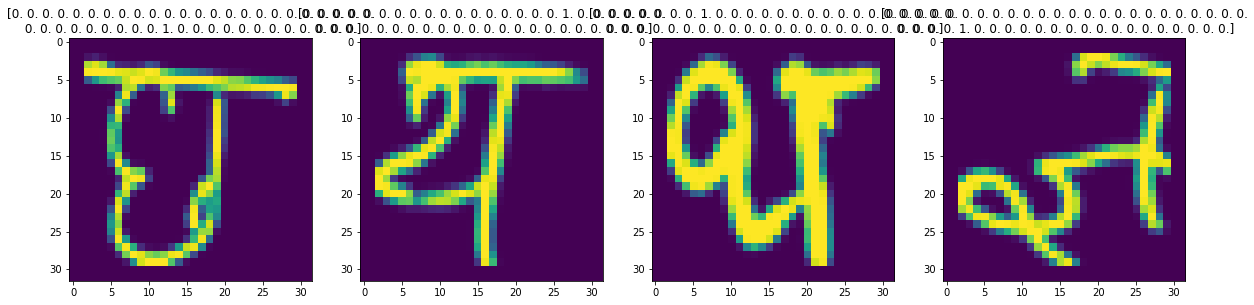

In [383]:
#plotting a batch of training data
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [384]:
#scaling training data
train_data = train_data.map(lambda x, y : (x/255, y))

In [385]:
train_data.as_numpy_iterator().next()

(array([[[[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         ...,
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]]],
 
 
        [

In [386]:
#splitting data into training and validation sets
train_size = int(len(train_data)*.8)
val_size = int(len(train_data)*.2)

In [387]:
train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)

In [388]:
#importing dependencies for model training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation

In [389]:
#defing ML model - CNN
model = Sequential()

model.add(Conv2D(8, kernel_size=(3, 3), strides=1,  input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Conv2D(8, kernel_size=(3, 3), strides=1))
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.6))

model.add(Flatten())

model.add(Dense(46))
model.add(Activation('softmax'))

In [390]:
#optimizer and model compilation
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.75)
model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [391]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 30, 30, 8)         80        
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 15, 15, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 13, 13, 8)         584       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 dense_40 (Dense)            (None, 7, 7, 128)         1152      
                                                                 
 activation_22 (Activation)  (None, 7, 7, 128)       

In [393]:
#training model for 50 epochs
hist = model.fit(train, epochs=50, validation_data=val)

Epoch 1/50
489/489 [==============================] - 70s 143ms/step - loss: 0.5611 - accuracy: 0.8395 - val_loss: 0.3154 - val_accuracy: 0.9137
Epoch 2/50
489/489 [==============================] - 28s 57ms/step - loss: 0.3545 - accuracy: 0.8976 - val_loss: 0.2469 - val_accuracy: 0.9314
Epoch 3/50
489/489 [==============================] - 28s 57ms/step - loss: 0.2835 - accuracy: 0.9163 - val_loss: 0.2081 - val_accuracy: 0.9414
Epoch 4/50
489/489 [==============================] - 28s 58ms/step - loss: 0.2448 - accuracy: 0.9271 - val_loss: 0.1864 - val_accuracy: 0.9493
Epoch 5/50
489/489 [==============================] - 28s 57ms/step - loss: 0.2137 - accuracy: 0.9361 - val_loss: 0.1718 - val_accuracy: 0.9535
Epoch 6/50
489/489 [==============================] - 28s 57ms/step - loss: 0.1937 - accuracy: 0.9419 - val_loss: 0.1570 - val_accuracy: 0.9560
Epoch 7/50
489/489 [==============================] - 28s 57ms/step - loss: 0.1776 - accuracy: 0.9454 - val_loss: 0.1543 - val_accuracy

In [394]:
#collecting testing dataset
test_data = tf.keras.utils.image_dataset_from_directory("data/test", label_mode='categorical', image_size=(32, 32), color_mode="grayscale")
test_data = test_data.map(lambda x, y : (x/255, y))

Found 13800 files belonging to 46 classes.


In [395]:
#testing model for 15% of datatset
model.evaluate(test_data)

432/432 [==============================] - 14s 31ms/step - loss: 0.1068 - accuracy: 0.9738


[0.10676375776529312, 0.9737681150436401]

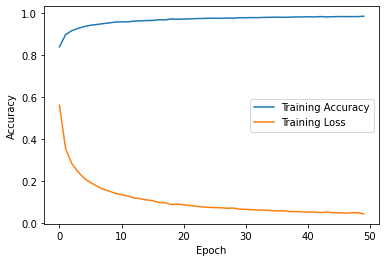

In [400]:
#plotting accuracy and loss graphs
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['loss'], label='Training Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

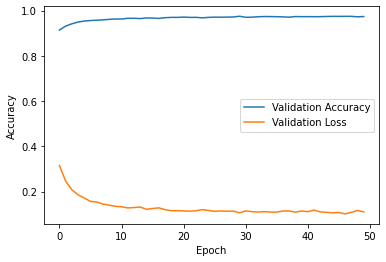

In [401]:
#plotting accuracy and loss graphs for validation
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [398]:
model.save('Models/model.h5')